<a href="https://colab.research.google.com/github/verdakahle/Global-AI-Hub-Proje-1-/blob/main/Global_AI_Hub_Proje_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))




In [ ]:
data=pd.read_csv("/content/NetflixOriginals.csv", encoding="ISO-8859-1")
 

In [ ]:
data.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [ ]:
data.tail(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [ ]:
print("Number of rows found in the dataset:", data.shape[0])
print("Number of columns found in the dataset:", data.shape[1])

Number of rows found in the dataset: 584
Number of columns found in the dataset: 6


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
data["Date"] = pd.to_datetime(data.Premiere) 
data['Day'] = data['Date'].dt.day_of_week 
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year 
data.drop("Premiere", axis=1, inplace=True) 
data.head()

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30,4,10,2020


In [ ]:
print("Number of duplicated/replicated data in dataset:", data.duplicated().sum())

Number of duplicated/replicated data in dataset: 0


In [ ]:
runtime_threshold = 120.0 
runtime_thresh_data = data[data.Runtime >=runtime_threshold].sort_values(by="Runtime", ascending=False) 

runtime_thresh_data

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
561,The Irishman,Crime drama,209,7.8,English,2019-11-27,2,11,2019
328,Da 5 Bloods,War drama,155,6.5,English,2020-06-12,4,6,2020
581,Springsteen on Broadway,One-man show,153,8.5,English,2018-12-16,6,12,2018
284,The Forest of Love,Drama,151,6.3,Japanese,2019-10-11,4,10,2019
247,Citation,Drama,151,6.2,English,2020-11-06,4,11,2020
...,...,...,...,...,...,...,...,...,...
287,The Outsider,Crime drama,120,6.3,English/Japanese,2018-03-09,4,3,2018
97,Dolly Kitty and Those Twinkling Stars,Drama,120,5.4,Hindi,2020-09-18,4,9,2020
335,Lust Stories,Drama,120,6.5,Hindi,2018-06-15,4,6,2018
192,A Fall from Grace,Thriller,120,5.9,English,2020-01-17,4,1,2020


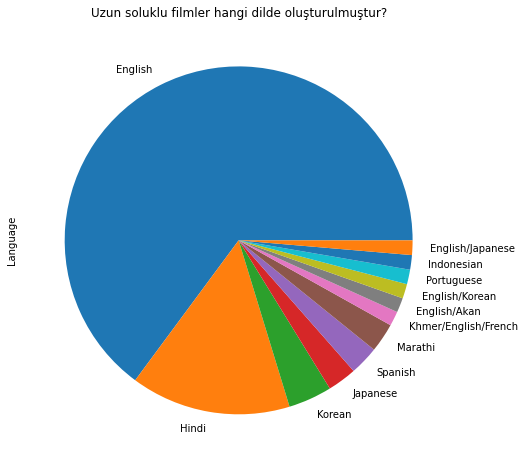

In [ ]:
#soru_bir_cevap
plt.figure(figsize=(8,8))
runtime_thresh_data["Language"].value_counts().plot(kind='pie')

plt.title("Uzun soluklu filmler hangi dilde oluşturulmuştur?")

plt.xticks(rotation=90)
plt.show()

In [ ]:
January = 1 
June = 6 

start = (data["Year"]==2019) & (data["Month"]>=January) 
finish = (data["Year"]==2020) & (data["Month"]<=June) 

In [ ]:
date_range = data.loc[:, ["Title","Genre","IMDB Score", "Date"]][data["Genre"] == "Documentary"][start | finish] 

date_range.sort_values(by = "Date", ascending=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Title,Genre,IMDB Score,Date
510,ReMastered: Massacre at the Stadium,Documentary,7.3,2019-01-11
482,Fyre: The Greatest Party That Never Happened,Documentary,7.2,2019-01-18
511,ReMastered: The Two Killings of Sam Cooke,Documentary,7.3,2019-02-08
524,Period. End of Sentence.,Documentary,7.4,2019-02-12
324,Antoine Griezmann: The Making of a Legend,Documentary,6.5,2019-03-21
444,ReMastered: The Miami Showband Massacre,Documentary,7.0,2019-03-22
286,The Legend of Cocaine Island,Documentary,6.3,2019-03-29
536,Homecoming: A Film by Beyonce,Documentary,7.5,2019-04-17
554,Brene Brown: The Call to Courage,Documentary,7.7,2019-04-19
462,Grass Is Greener,Documentary,7.1,2019-04-20


In [ ]:
#soru_uc_cevap
english_best_imdb = data.loc[:, ["Language", "IMDB Score", "Genre"]][data["IMDB Score"] == data["IMDB Score"].max()][data["Language"] == "English"]

english_best_imdb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Language,IMDB Score,Genre
583,English,9.0,Documentary


In [ ]:
#soru_dort_cevap
print("What is the duration of Indian movies?", data["Runtime"][data["Language"] == "Hindi"].mean())

What is the duration of Indian movies? 115.78787878787878


In [ ]:
#soru_bes_cevap
print("Total number of categories in the Genre column:", len(data.Genre.unique()))

Total number of categories in the Genre column: 115


In [ ]:
print("Categories in the Genre column:\n", data.Genre.unique())

Categories in the Genre column:
 ['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic'
 'Science fiction/Thriller' '

In [ ]:
plt.figure(figsize = (20,15))
data.Genre.value_counts().plot(kind='bar')
plt.title("Visualization")
plt.xlabel("Genre")
plt.ylabel("Quantity")
plt.xticks(rotation=90)
plt.show()

TypeError: ignored

In [ ]:
#soru_alti_cevap
print("The 3 most used languages:")
print(data.Language.value_counts()[:3])


The 3 most used languages:
English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


In [ ]:
#soru_yedi_cevap
data.loc[:, ["IMDB Score", "Title"]].iloc[data["IMDB Score"].sort_values(ascending=False)[:10].index]

,IMDB Score,Title
583,9.0,David Attenborough: A Life on Our Planet
582,8.6,Emicida: AmarElo - It's All For Yesterday
581,8.5,Springsteen on Broadway
580,8.4,Winter on Fire: Ukraine's Fight for Freedom
579,8.4,Taylor Swift: Reputation Stadium Tour
578,8.4,Ben Platt: Live from Radio City Music Hall
577,8.3,Dancing with the Birds
576,8.3,Cuba and the Cameraman
573,8.2,Klaus
571,8.2,13th


AttributeError: ignored

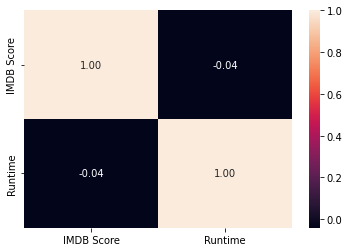

In [ ]:
#soru_sekiz_cevap
corr = data.loc[:, ["IMDB Score", "Runtime"]].corr()

sns.heatmap(corr, annot = True, fmt=".2f")
plt.title("IMDB-Runtime correlation")
plt.show() 

In [ ]:
#soru_dokuz_cevap
imdb_10_genre = data.loc[:, ["IMDB Score", "Genre"]].iloc[data["IMDB Score"].sort_values(ascending=False)[:10].index]
imdb_10_genre

,IMDB Score,Genre
583,9.0,Documentary
582,8.6,Documentary
581,8.5,One-man show
580,8.4,Documentary
579,8.4,Concert Film
578,8.4,Concert Film
577,8.3,Documentary
576,8.3,Documentary
573,8.2,Animation/Christmas/Comedy/Adventure
571,8.2,Documentary


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AttributeError: ignored

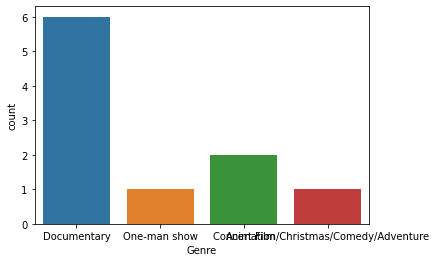

In [ ]:
sns.countplot(imdb_10_genre.Genre)
plt.xticks(rotation=45)
plt.title("Top 10 Genre with IMDB Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#soru_on_cevap
runtime_10_film = data.loc[:, ["Runtime", "Title"]].iloc[data["Runtime"].sort_values(ascending=False)[:10].index]
runtime_10_film

,Runtime,Title
561,209,The Irishman
328,155,Da 5 Bloods
581,153,Springsteen on Broadway
247,151,Citation
284,151,The Forest of Love
509,149,Raat Akeli Hai
7,149,The Last Days of American Crime
543,149,Ludo
194,148,Army of the Dead
5,147,Drive


In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x= "Title", y= "Runtime", data=runtime_10_film)
plt.title("10 Movies with Highest Runtime Value")
plt.xticks(rotation=90)
plt.grid()
plt.show()

TypeError: ignored

AttributeError: ignored

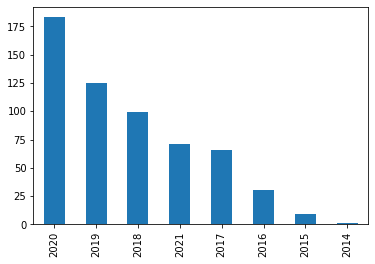

In [ ]:
#soru_onbir_cevap
data["Year"].value_counts().plot(kind="bar")
plt.title("Number of Movie Views by Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies Watched")
plt.show()

In [ ]:
#soru_oniki_cevap
threshold = 4.5 

film_worst_imdb = data.loc[:,["Language", "IMDB Score"]][data["IMDB Score"] < threshold]
film_worst_imdb

,Language,IMDB Score
0,English/Japanese,2.5
1,Spanish,2.6
2,Italian,2.6
3,English,3.2
4,Hindi,3.4
5,Hindi,3.5
6,Turkish,3.7
7,English,3.7
8,English,3.9
9,Hindi,4.1


AttributeError: ignored

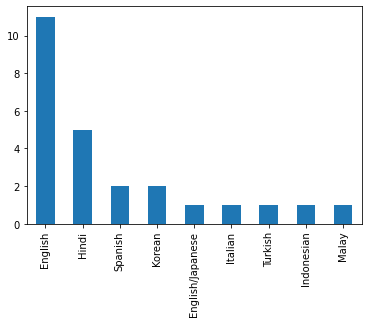

In [ ]:
film_worst_imdb.Language.value_counts().plot(kind="bar")
plt.title("Total Number of Movie Languages with Bad IMDB Ratings")
plt.xlabel("Languages")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
#soru_onuc_cevap
years_runtime = data[["Year", "Runtime"]].groupby("Year").sum()

years_runtime 

,Runtime
Year,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


In [ ]:
plt.figure(figsize=(10,10))
plt.pie(years_runtime["Runtime"], autopct="%.2f%%", labels=years_runtime.index)
plt.legend()
plt.title("Runtimes by Years")
plt.show()

TypeError: ignored

In [ ]:
#soru_ondort_cevap
def lang_most_genre(data, columns):
    for col in columns:
        genre = data["Genre"][data["Language"] == col].mode()[0]
        count = data["Genre"][data["Language"] == col].value_counts()[0]
        if count > 1:
            print(f"{col} most used language(s) Genre:")
            print(f"{genre}({count} film)")
        else:
            print(f"{col} language(s) have been used at most once in movies.")
        print("*"*32)

langs=data.Language.unique()
lang_most_genre(data,langs)

English/Japanese language(s) have been used at most once in movies.
********************************
Spanish most used language(s) Genre:
Documentary(8 film)
********************************
Italian most used language(s) Genre:
Drama(4 film)
********************************
English most used language(s) Genre:
Documentary(120 film)
********************************
Hindi most used language(s) Genre:
Drama(13 film)
********************************
Turkish most used language(s) Genre:
Comedy(2 film)
********************************
Korean most used language(s) Genre:
Drama(2 film)
********************************
Indonesian most used language(s) Genre:
Drama(3 film)
********************************
Malay language(s) have been used at most once in movies.
********************************
Dutch language(s) have been used at most once in movies.
********************************
French most used language(s) Genre:
Documentary(6 film)
********************************
English/Spanish most used 

In [ ]:
#soru_onbes_cevap
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)


def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outlier(df, col, 0.1, 0.9))

print("conclusion: As a result of the output of the functions that perform outlier analysis with the extreme values determined in the data set, no outliers observed.")

NameError: ignored